# Introduction

Using Google Trends to explore if search popularity relates to other kinds of data.

Google's search volume v.s. the price of Bitcoin or Tesla.

Search volume for "Unemployment Benefits" v.s. unemployment rates?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Setup date features

In [168]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

# Read the Data

In [169]:
df_tesla_price = pd.read_csv('TSLA.csv')
df_tesla_search = pd.read_csv('TSLA_Search.csv')

df_btc_search = pd.read_csv('BTC_Search.csv')
df_btc_price = pd.read_csv('BTC-USD.csv')

df_unemployment_rate = pd.read_csv('Unemployment_Rate.csv')
df_unemployment_search = pd.read_csv('Unemployment_Search.csv')

In [170]:
# Change times to DateTimes

df_tesla_search['Month'] = pd.to_datetime(df_tesla_search['Month'])
df_tesla_price.Date = pd.to_datetime(df_tesla_price.Date)

df_btc_price.Date = pd.to_datetime(df_btc_price.Date)
df_btc_search['Month'] = pd.to_datetime(df_btc_search['Month'])

df_unemployment_rate.DATE = pd.to_datetime(df_unemployment_rate.DATE)
df_unemployment_search['Month'] = pd.to_datetime(df_unemployment_search['Month'])

# Data Exploration & Visualization

### Tesla

In [171]:
print(df_tesla_search.isna().values.any()) # Check for missing values.
print(df_tesla_price.isna().values.any())

False
False


In [172]:
df_tesla_search.head()

,Month,Search
0,2010-07-01,6
1,2010-08-01,4
2,2010-09-01,4
3,2010-10-01,5
4,2010-11-01,5


In [173]:
df_tesla_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000,5.184,2.996,3.988,3.988,322879000
1,2010-08-01,4.100,4.436,3.478,3.896,3.896,75191000
2,2010-09-01,3.924,4.632,3.900,4.082,4.082,90229500
3,2010-10-01,4.138,4.374,4.000,4.368,4.368,32739000
4,2010-11-01,4.388,7.200,4.210,7.066,7.066,141575500


In [174]:
df_tesla_price['Monthly Average'] = (df_tesla_price['High'] + df_tesla_price['Low']) / 2

In [175]:
df_tesla_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Monthly Average
0,2010-07-01,5.000,5.184,2.996,3.988,3.988,322879000,4.090
1,2010-08-01,4.100,4.436,3.478,3.896,3.896,75191000,3.957
2,2010-09-01,3.924,4.632,3.900,4.082,4.082,90229500,4.266
3,2010-10-01,4.138,4.374,4.000,4.368,4.368,32739000,4.187
4,2010-11-01,4.388,7.200,4.210,7.066,7.066,141575500,5.705


In [176]:
df_tesla_price.describe()

,Open,High,Low,Close,Adj Close,Volume,Monthly Average
count,144.000000,144.000000,144.000000,144.000000,144.000000,1.440000e+02,144.000000
mean,156.063681,176.632027,133.289472,159.042708,159.042708,6.515976e+08,154.960750
std,278.730956,309.508599,230.927165,277.730617,277.730617,4.655688e+08,269.717024
min,3.924000,4.374000,2.996000,3.896000,3.896000,3.273900e+07,3.957000
25%,21.285000,26.368499,20.087500,24.459999,24.459999,3.262439e+08,23.111749
50%,48.149999,51.845001,42.847000,48.163000,48.163000,5.763724e+08,46.771001
75%,68.850502,74.388998,61.950001,68.595497,68.595497,8.574500e+08,67.665998
max,1160.699951,1243.489990,978.599976,1144.760010,1144.760010,2.362934e+09,1111.044983


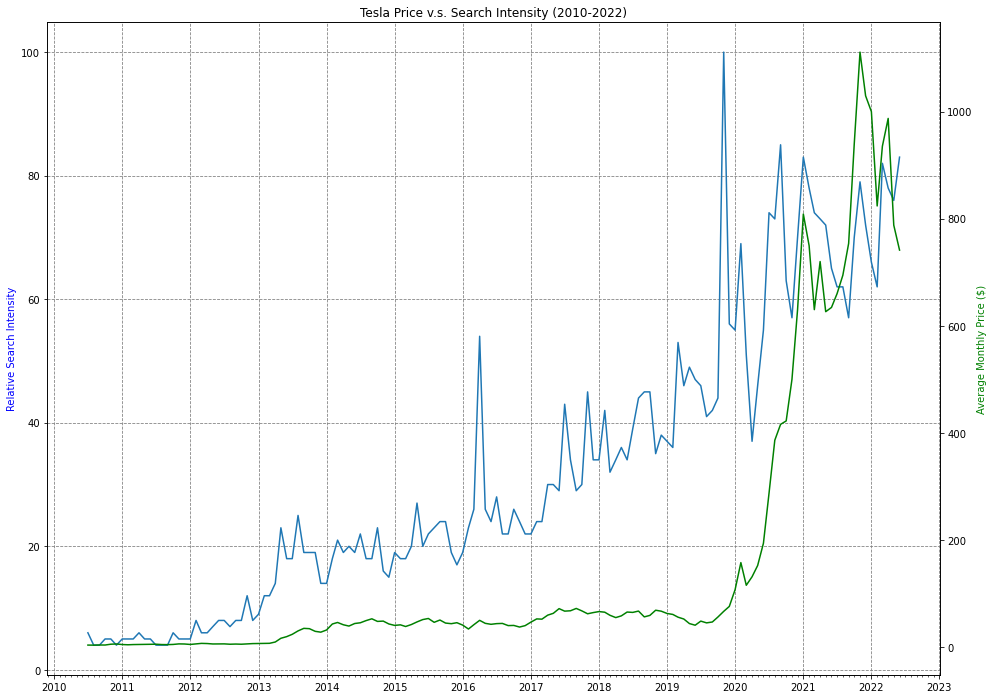

In [177]:
plt.figure(figsize=(16, 12))

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')

ax2.plot(df_tesla_price.Date, df_tesla_price['Monthly Average'], 'g')
ax1.plot(df_tesla_search['Month'], df_tesla_search['Search'])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.title('Tesla Price v.s. Search Intensity (2010-2022)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Monthly Price ($)', color='green')
ax1.set_ylabel('Relative Search Intensity', color='blue')

plt.show()

Monthly average TSLA price in $ v.s. Google Trends Search Intensity for TSLA. Monthly from 2010 to 06/2022.

### Bitcion

In [178]:
print(df_btc_price.isna().values.any()) # Check for missing values.
print(df_btc_search.isna().values.any())

False
False


In [179]:
df_btc_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-01,387.427002,411.697998,289.295990,338.321014,338.321014,902994450
1,2014-11-01,338.649994,457.092987,320.626007,378.046997,378.046997,659733360
2,2014-12-01,378.248993,384.037994,304.231995,320.192993,320.192993,553102310
3,2015-01-01,320.434998,320.434998,171.509995,217.464005,217.464005,1098811912
4,2015-02-01,216.867004,265.610992,212.014999,254.263000,254.263000,711518700


In [180]:
df_btc_price['Monthly Average'] = (df_btc_price['High'] + df_btc_price['Low']) / 2
df_btc_price.describe()

,Open,High,Low,Close,Adj Close,Volume,Monthly Average
count,93.000000,93.000000,93.000000,93.000000,93.000000,9.300000e+01,93.000000
mean,12333.883966,14789.967424,10358.767703,12658.492330,12658.492330,4.637543e+11,12574.367563
std,16589.170150,19434.786739,13750.997724,16651.709749,16651.709749,5.580671e+11,16542.395310
min,216.867004,247.804001,171.509995,217.464005,217.464005,5.531023e+08,238.188500
25%,624.601990,720.401978,609.479004,673.336975,673.336975,2.686220e+09,658.401001
50%,6440.970215,7754.890137,5826.410156,6625.560059,6625.560059,1.937517e+11,6792.975098
75%,10796.930664,13796.489258,9694.650391,11323.466797,11323.466797,8.301159e+11,11685.735840
max,61320.449219,68789.625000,53569.765625,61318.957031,61318.957031,2.267153e+12,61179.695312


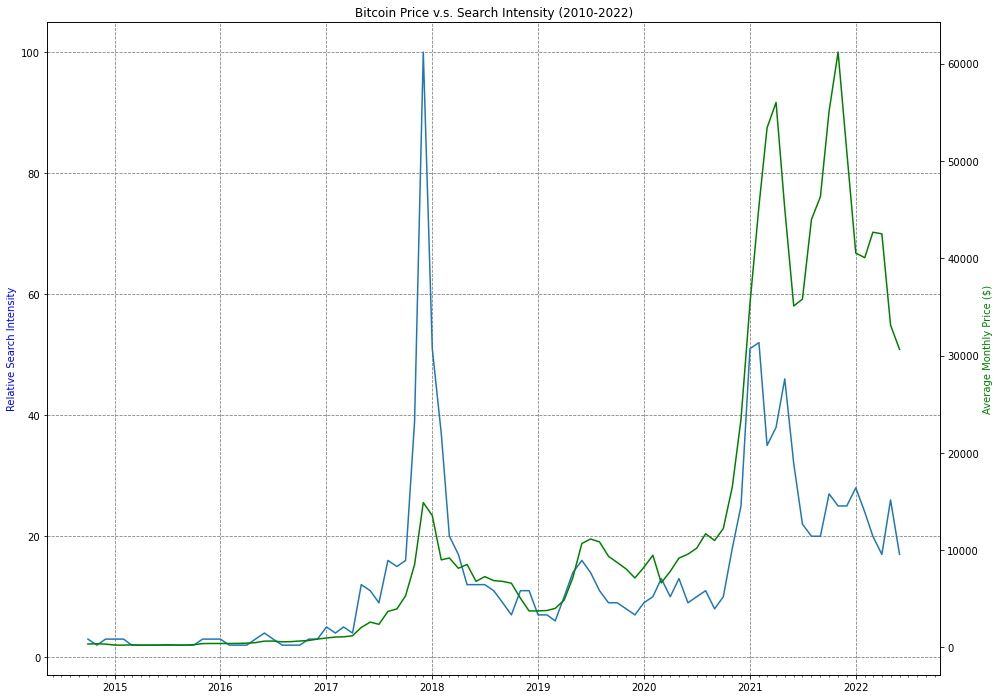

In [181]:
plt.figure(figsize=(16, 12))

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')

ax2.plot(df_btc_price.Date, df_btc_price['Monthly Average'], 'g')
ax1.plot(df_btc_search['Month'], df_btc_search['Search'])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.title('Bitcoin Price v.s. Search Intensity (2010-2022)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Monthly Price ($)', color='green')
ax1.set_ylabel('Relative Search Intensity', color='blue')

plt.show()

Monthly average BTC price in $ v.s. Google Trends Search Intensity for Bitcoin. Monthly from 2014 to 06/2022.


### Unemployment Data

In [182]:
df_unemployment_rate.head()

,DATE,UNRATE
0,2004-01-01,5.7
1,2004-02-01,5.6
2,2004-03-01,5.8
3,2004-04-01,5.6
4,2004-05-01,5.6


In [183]:
df_unemployment_search.head()

,Month,Search
0,2004-01-01,5
1,2004-02-01,4
2,2004-03-01,4
3,2004-04-01,4
4,2004-05-01,4


In [184]:
df_unemployment_search.describe()

,Search
count,221.000000
mean,10.018100
std,11.819462
min,3.000000
25%,4.000000
50%,6.000000
75%,11.000000
max,100.000000


In [185]:
df_unemployment_rate.describe()

,UNRATE
count,221.000000
mean,6.089140
std,2.074142
min,3.500000
25%,4.600000
50%,5.400000
75%,7.700000
max,14.700000


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

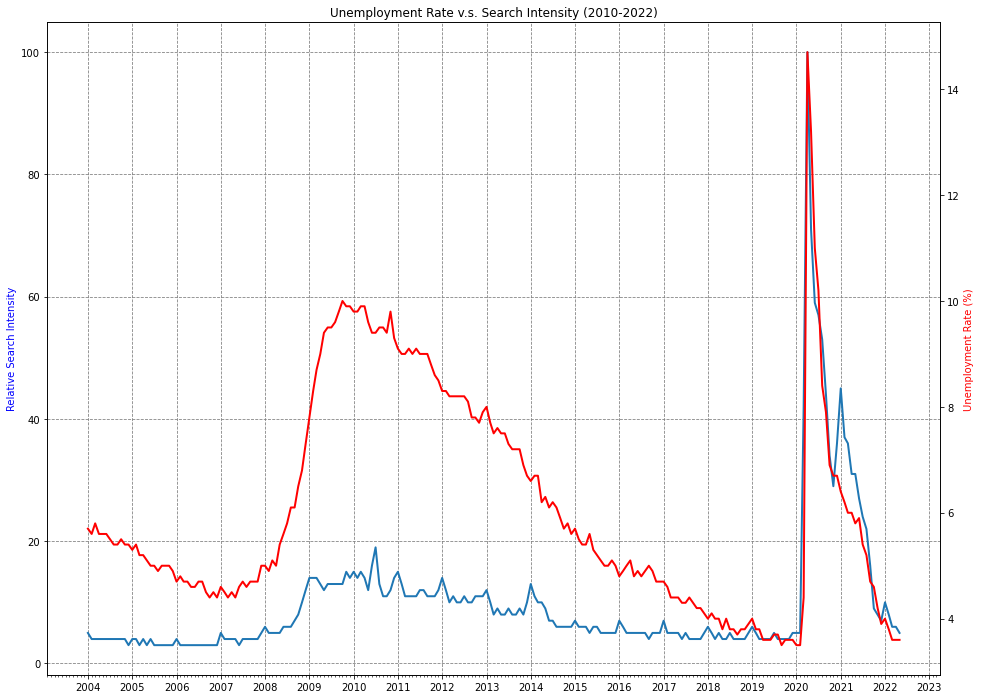

In [194]:
plt.figure(figsize=(16, 12))

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')

ax2.plot(df_unemployment_rate.DATE, df_unemployment_rate['UNRATE'], 'r', linewidth=2)
ax1.plot(df_unemployment_search['Month'], df_unemployment_search['Search'], linewidth=2)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

plt.title('Unemployment Rate v.s. Search Intensity (2010-2022)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Unemployment Rate (%)', color='red')
ax1.set_ylabel('Relative Search Intensity', color='blue')

plt.show()

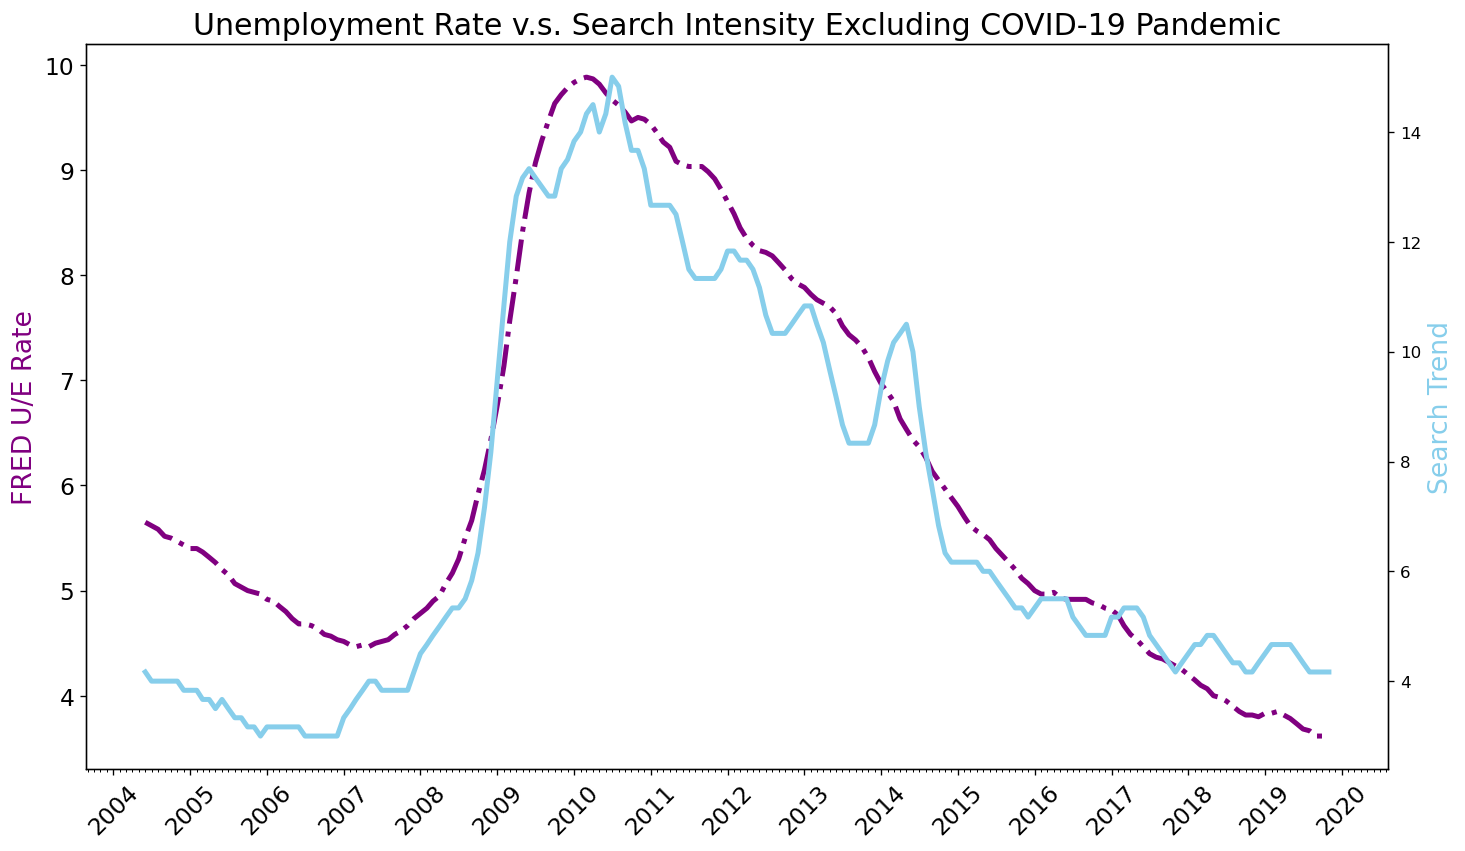

In [209]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Unemployment Rate v.s. Search Intensity Excluding COVID-19 Pandemic', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)



roll_df_search = df_unemployment_search['Search'][:-30].rolling(window=6).mean()
roll_df_rate = df_unemployment_rate.UNRATE[:-30].rolling(window=6).mean()

ax1.plot(df_unemployment_rate.DATE[:-30], roll_df_rate, 'purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment_search.Month[:-30], roll_df_search, 'skyblue', linewidth=3)

plt.show()